In [ ]:
# opencv-python 入門 第三課

# 我們將會學習：
# Face Detection using Haar Cascade Classifiers
# cv2.CascadeClassifier()
# cv2.cvtColor()
# cv2.CascadeClassifier.detectMultiScale()
# cv2.resize()


In [15]:
# 例子一：利用 haar分類器 找出 lena.jpg 中的人臉

import cv2
import numpy as np

img = cv2.imread('lena.jpg')
# 建立一張灰色的img，提高人臉檢測的計算速度
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 載入分類器
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# 用 detectMultiScale 進行人臉檢測
# 形式：face_cascade.detectMultiScale(image, scaleFactor, minNeighbors)
# image: matrix of image
# scaleFactor: parameter(>1, 默認為1.1), 決定檢測尺寸的大小，數字越接近1，檢測尺寸越小
# minNeighbors: parameter(非負整數, 默認為3), 控制著誤差檢測，表明至少有n次重複檢測，我們才認為存在人臉

faces = face_cascade.detectMultiScale(img_gray, 1.1, 3)

# 此時 faces 傳回的將會是 4 個參數數值
# 第1個：發現人臉的 起始座標(x坐標)
# 第2個：發現人臉的 起始座標(y坐標)
# 第3個：人臉的 x坐標 長度
# 第4個：人臉的 y坐標 長度

# 讀取、命名、使用 faces 的 4 個參數數值
for (x,y,w,h) in faces:
    # 圖像中加入矩形
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
    # 在人臉方框的左下角加入文字
    text = 'Face Detection using Haar Cascade Classifier'
    font = cv2.FONT_HERSHEY_SIMPLEX
    size = 0.3
    X = x-20
    Y = y+h+10
    img = cv2.putText(img, text, (X,Y), font, size, (255,255,255), 1, cv2.LINE_AA)

# cv2.imwrite('sample_3_1.jpg',img)
cv2.imshow('sample_3_1',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


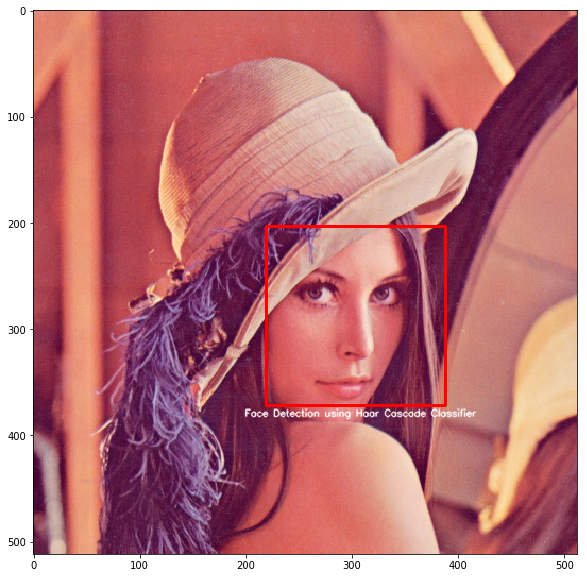

In [4]:
# 如上一塊代碼執行不了，可執行這塊代碼
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('lena.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img_gray, 1.1, 3)

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
    text = 'Face Detection using Haar Cascade Classifier'
    font = cv2.FONT_HERSHEY_SIMPLEX
    size = 0.3
    X = x-20
    Y = y+h+10
    img = cv2.putText(img, text, (X,Y), font, size, (255,255,255), 1, cv2.LINE_AA)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [32]:
# 例子二：截取 messi.jpg 中的人臉，並 截取頭像 和 放大圖像

import cv2
import numpy as np

img = cv2.imread('messi.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2.imshow('sample_3_2',img)

# ------------------------------------------------------

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img_gray, 1.1, 5)

for (x,y,w,h) in faces:
    # img2 = img[y:y+h,x:x+w]
    img2 = img[y:y+h,x:x+w]

# cv2.imwrite('sample_3_2a.jpg',img2)
cv2.imshow('sample_3_2a',img2)

# ------------------------------------------------------

# 形式：cv2.resize(InputArray, OutputArray, Size dsize, fx=0, fy=0, interpolation=INTER_LINEAR);
# Size dsize 與 fx=0, fy=0, 二選一即可
# interpolation, 默認 INTER_LINEAR - 雙線性插值, 但 INTER_NEAREST - 最鄰近插值 比較好睇!!!仲有其他方式

# 實例
# img3 = cv2.resize(img2, (0, 0), fx=10, fy=10, interpolation=cv2.INTER_LINEAR)
img3 = cv2.resize(img2, (400, 400), interpolation=cv2.INTER_LINEAR)

text = 'messi'
font = cv2.FONT_HERSHEY_SIMPLEX
size = 2
img3 = cv2.putText(img3, text, (120,80), font, size, (0,255,255), 2, cv2.LINE_AA)

# cv2.imwrite('sample_3_2b.jpg',img3)
cv2.imshow('sample_3_2b',img3)

# ------------------------------------------------------

cv2.waitKey(0)
cv2.destroyAllWindows()

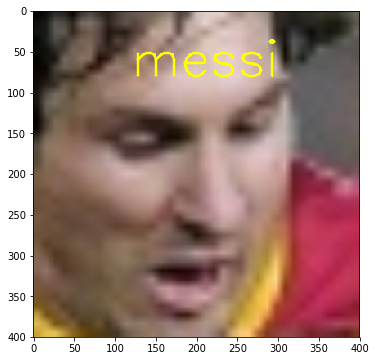

In [18]:
# Mac機 / 如上一塊代碼執行不了，可執行這塊代碼
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('messi.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img_gray, 1.1, 5)

for (x,y,w,h) in faces:
    img2 = img[y:y+h,x:x+w]

img3 = cv2.resize(img2, (400, 400), interpolation=cv2.INTER_LINEAR)

text = 'messi'
font = cv2.FONT_HERSHEY_SIMPLEX
size = 2
img3 = cv2.putText(img3, text, (120,80), font, size, (0,255,255), 2, cv2.LINE_AA)

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img3)

In [36]:
# 例子三：截取 couple.jpg 中 每個人 的臉

import cv2

img = cv2.imread('couple.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img_gray, 1.1, 5)

i = 0
for (x,y,w,h) in faces:
    # 截取人臉
    img2 = img[y:y+h,x:x+w]
    
    # 命名並保存
    # %d表示十進制數值、%s表示字符串
    face_filename = 'face%d' % i
    name = 'sample_3_3(%s).jpg' % face_filename
    cv2.imwrite(name, img2)
    i += 1

    # 在原圖中標記人臉，可以自行檢視有沒有誤判人臉
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
    
# ------------------------------------------------------

cv2.imshow('window_name',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


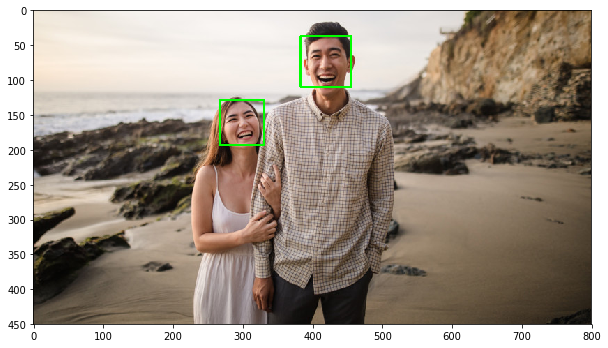

In [22]:
# Mac機 / 如上一塊代碼執行不了，可執行這塊代碼
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('couple.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img_gray, 1.1, 5)

i = 0
for (x,y,w,h) in faces:
    img2 = img[y:y+h,x:x+w]
    face_filename = 'face%d' % i
    name = 'sample_3_3(%s).jpg' % face_filename
    cv2.imwrite(name, img2)
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
    i += 1

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [ ]:
# 練習一：
# (1)讀取彩色圖像 girls.jpg 並顯示
# (2)截取並顯示圖像中每個人的臉
# (3)保存每張人臉的灰階圖，分別命名為「exercise_3_1(girlX).jpg」，其中X為數字



# 開始編程










# 結束編程


In [ ]:
# 練習二：
# (1)讀取彩色圖像 couple2.jpg 並顯示
# (2)用圓形標記出每張人臉
# (3)在男生人臉上方加入文字「boy」、在女生人臉上方加入文字「girl」
# (4)顯示和保存圖像，命名為「exercise_3_2.jpg」



# 開始編程










# 結束編程
